In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mnso
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import scatter_matrix
from datetime import datetime
import squarify
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option("display.float_format",lambda x: '%.5f'% x)

In [57]:
# loading datasets
SouthAfricaCrimeStats_df = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
ProvincePopulation_df = pd.read_csv("ProvincePopulation.csv")
SouthAfricaCrimeStats_df['Total 2005-2016'] = SouthAfricaCrimeStats_df.sum(axis=1)
# making province as index  
SouthAfricaCrimeStats_df.set_index('Province')
ProvincePopulation_df.set_index('Province')

SouthAfricaCrimeStats_df.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


In [58]:
# joining crime stats with province stats
df_outer = pd.merge(SouthAfricaCrimeStats_df, ProvincePopulation_df, on='Province', how='left')
df_outer.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187,12272263,18178,675.1
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776,2745590,129825,21.1
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889,12272263,18178,675.1


In [59]:
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30861 entries, 0 to 30860
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Province         30861 non-null  object 
 1   Station          30861 non-null  object 
 2   Category         30861 non-null  object 
 3   2005-2006        30861 non-null  int64  
 4   2006-2007        30861 non-null  int64  
 5   2007-2008        30861 non-null  int64  
 6   2008-2009        30861 non-null  int64  
 7   2009-2010        30861 non-null  int64  
 8   2010-2011        30861 non-null  int64  
 9   2011-2012        30861 non-null  int64  
 10  2012-2013        30861 non-null  int64  
 11  2013-2014        30861 non-null  int64  
 12  2014-2015        30861 non-null  int64  
 13  2015-2016        30861 non-null  int64  
 14  Total 2005-2016  30861 non-null  int64  
 15  Population       30861 non-null  int64  
 16  Area             30861 non-null  int64  
 17  Density     

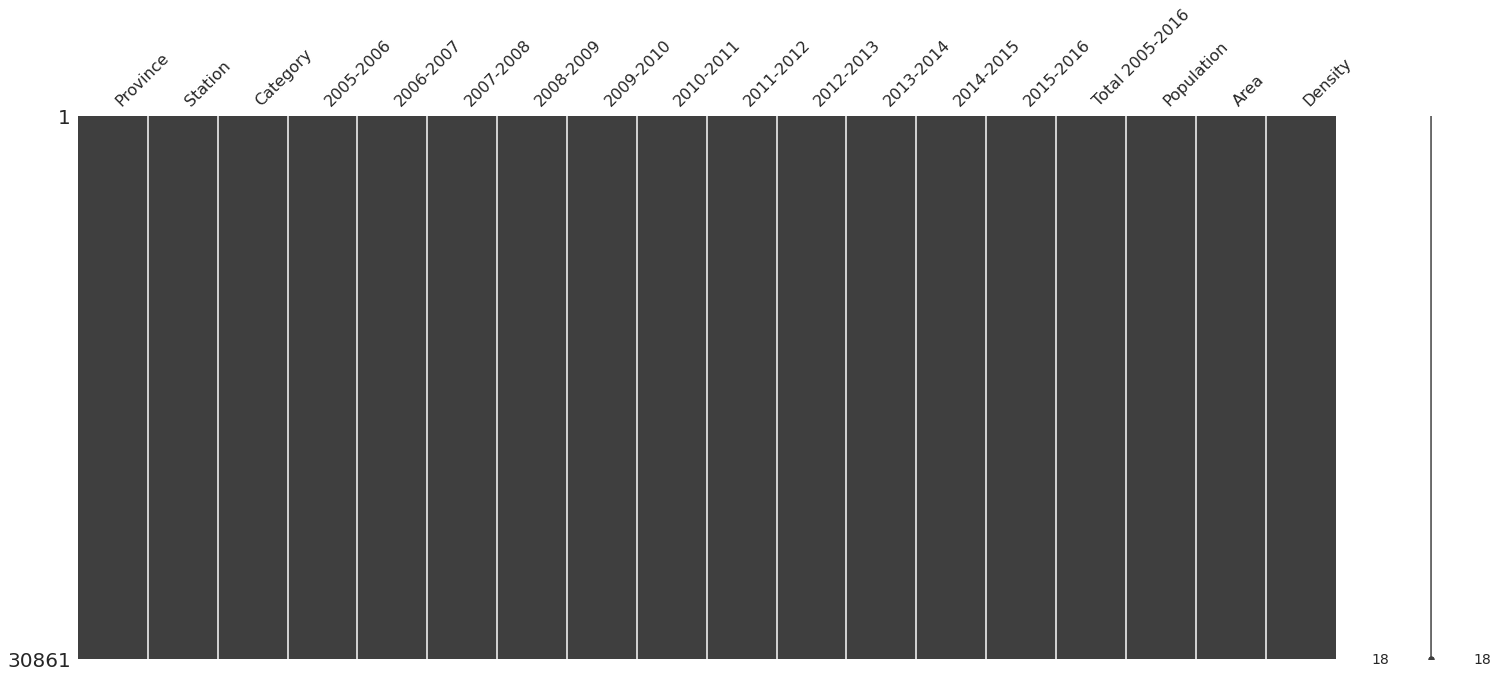

In [60]:
mnso.matrix(df_outer)

In [61]:
# Group Crime Counts by Province
crimes_by_province = df_outer.groupby(['Province'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Category
crimes_by_category = df_outer.groupby(['Category'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Station
crimes_by_station = df_outer.groupby(['Station'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]

In [62]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016',ascending=False)

In [63]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(df_outer['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)
total_province_stations

,Total Stations,Province
0,5292,Eastern Cape
1,5022,Kwazulu/Natal
2,4050,Western Cape
3,3861,Gauteng
4,2970,Free State
5,2673,Limpopo
6,2457,Northern Cape
7,2322,Mpumalanga
8,2214,North West


In [64]:
# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
ProvincePopulation_df.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = ProvincePopulation_df['Population']
province_totals['Area'] = ProvincePopulation_df['Area']
province_totals['Density'] = ProvincePopulation_df['Density']

# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
population_stats = ProvincePopulation_df.reset_index()

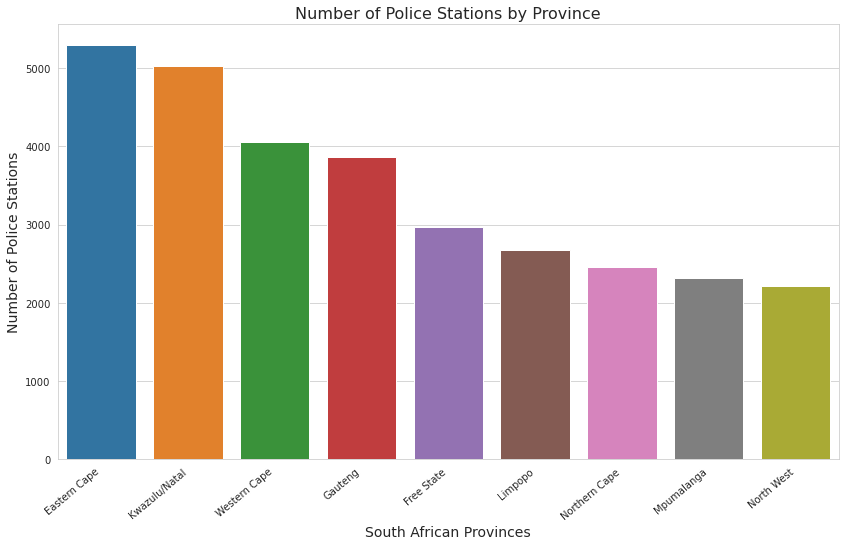

In [65]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

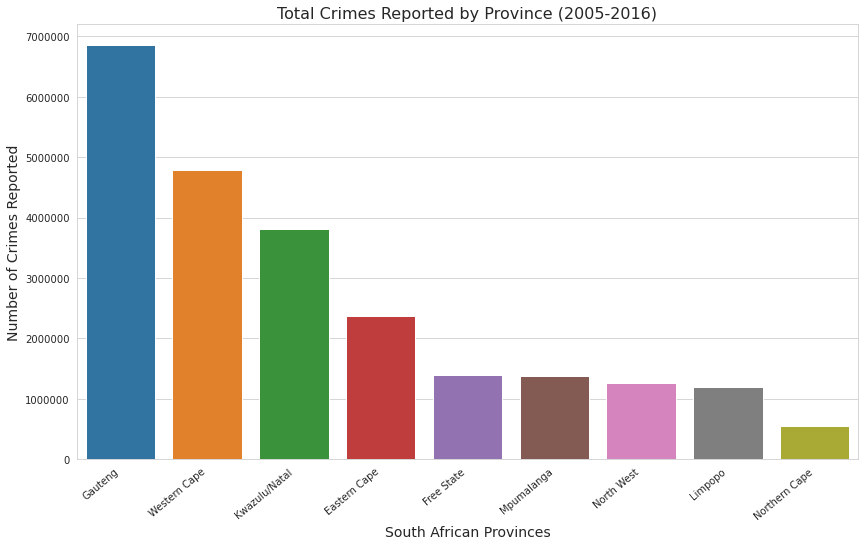

In [86]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

In [67]:

fig = px.treemap(df_outer, 
                 path=['Category'], 
                 values='Total 2005-2016',
                 color='Total 2005-2016',
                 title = 'Total Crimes Reported by Category (2005-2016)'
                )
fig.show()

Unsupported

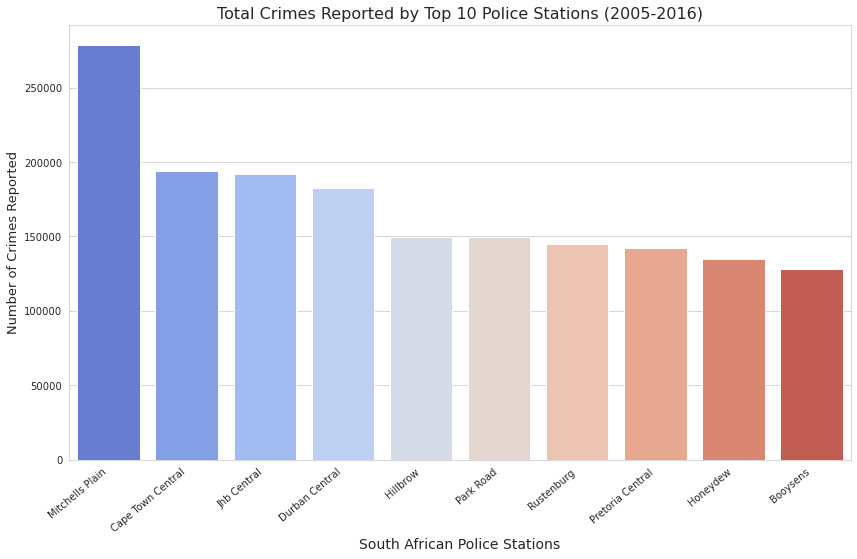

In [68]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [69]:
df_outer['Province'].unique()

array(['Western Cape', 'Gauteng', 'Free State', 'North West',
       'Kwazulu/Natal', 'Mpumalanga', 'Eastern Cape', 'Limpopo',
       'Northern Cape'], dtype=object)

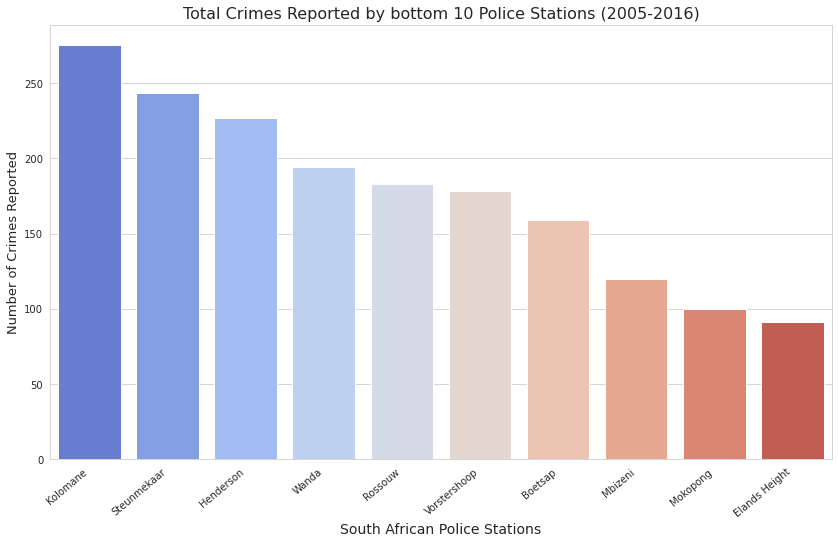

In [70]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.tail(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by bottom 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [90]:
corr = province_totals.corr()
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.98,0.98,0.99,0.57,0.89,-0.57,0.86
2006-2007,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.99,0.99,1.00,0.57,0.88,-0.57,0.84
2007-2008,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.57,0.83
2008-2009,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.56,0.88,-0.57,0.84
2009-2010,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.56,0.82
2010-2011,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.58,0.86,-0.56,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.60,0.86,-0.55,0.76
2012-2013,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.59,0.85,-0.55,0.74
2013-2014,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.85,-0.54,0.78
2014-2015,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.55,0.83,-0.54,0.77


In [72]:
def wordcloud_by_province(province):
    df_new = df_outer[df_outer.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="Black",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in df_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

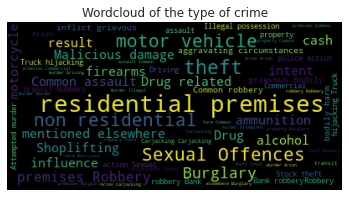

In [73]:
wordcloud_by_province('Western Cape')

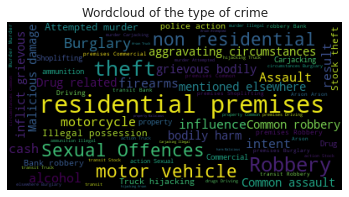

In [74]:
wordcloud_by_province('Gauteng')

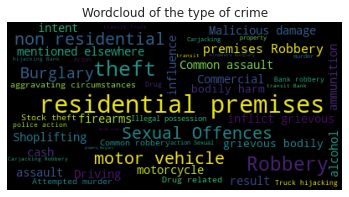

In [75]:
wordcloud_by_province('Free State')

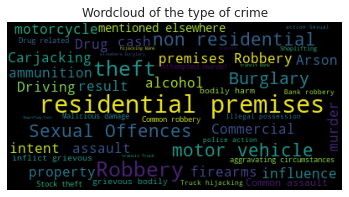

In [76]:
wordcloud_by_province('North West')

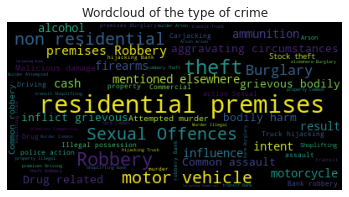

In [77]:
wordcloud_by_province('Kwazulu/Natal')

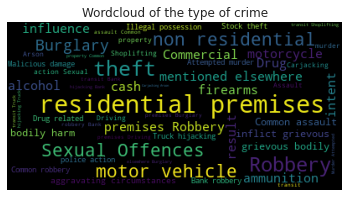

In [78]:
wordcloud_by_province('Mpumalanga')

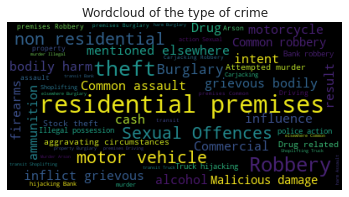

In [79]:
wordcloud_by_province('Limpopo')

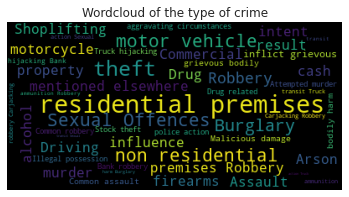

In [80]:
wordcloud_by_province('Northern Cape')